In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
loan_dataset = pd.read_csv (r'C:\Users\ADMIN\Desktop\Python project\Loan Prediction_ML\loan data file.csv')

In [4]:
loan_dataset.head ()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
type (loan_dataset)

pandas.core.frame.DataFrame

In [6]:
loan_dataset.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [7]:
loan_dataset.shape

(614, 13)

In [8]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset.describe ()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_dataset = loan_dataset.dropna ()

In [11]:
loan_dataset.shape

(480, 13)

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
loan_dataset.replace ({'Loan_Status' : {'Y' : 1,'N' : 0}},inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3032\2225701448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace ({'Loan_Status' : {'Y' : 1,'N' : 0}},inplace = True)


In [14]:
loan_dataset.head ()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan_dataset['Dependents'].value_counts ()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
loan_dataset.replace (to_replace = '3+', value = 4,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3032\1728240234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace (to_replace = '3+', value = 4,inplace=True)


In [17]:
loan_dataset['Dependents'].value_counts ()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

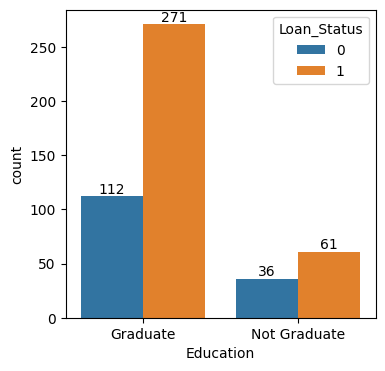

In [18]:
plt.figure (figsize = (4,4))
ax = sns.countplot (x = 'Education',data = loan_dataset,hue = 'Loan_Status')
for i in ax.containers:
    ax.bar_label (i)
plt.show ()

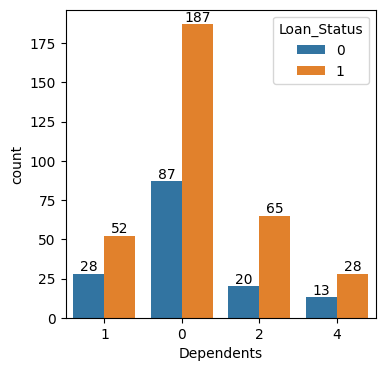

In [19]:
plt.figure (figsize = (4,4))
ax = sns.countplot (x = 'Dependents',data = loan_dataset,hue = 'Loan_Status')
for i in ax.containers:
    ax.bar_label (i)
plt.show ()

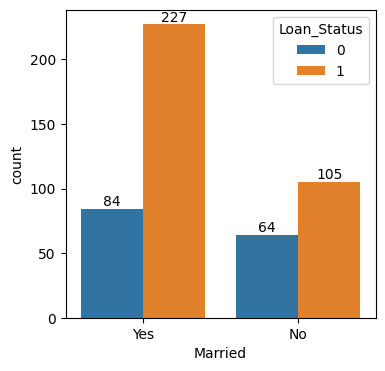

In [20]:
plt.figure (figsize = (4,4))
ax = sns.countplot (x = 'Married',data = loan_dataset,hue = 'Loan_Status')
for i in ax.containers:
    ax.bar_label (i)
plt.show ()

In [21]:
loan_dataset.replace ({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3032\3077146268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace ({'Gender':{'Male':1,'Female':0},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


In [22]:
loan_dataset.head ()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis = 1)
y = loan_dataset['Loan_Status']

In [24]:
print (x)
print (y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [37]:
scaler = StandardScaler ()

In [38]:
scaler.fit (x)

StandardScaler()

In [39]:
stadardized_data = scaler.transform (x)

In [40]:
print (stadardized_data)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]


In [25]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.1,stratify = y, random_state = 2)

In [26]:
print (x.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


In [27]:
classifier = svm.SVC (kernel = 'linear')

In [28]:
classifier.fit (x_train,y_train)

SVC(kernel='linear')

In [29]:
x_train_prediction = classifier.predict (x_train)
training_data_accuracy = accuracy_score (x_train_prediction,y_train)

In [30]:
print ('Accuracy of training data : ', training_data_accuracy)

Accuracy of training data :  0.7986111111111112


In [31]:
x_test_prediction = classifier.predict (x_test)
test_data_accuracy = accuracy_score (x_test_prediction,y_test)

In [32]:
print ('Accuracy of test data : ', test_data_accuracy)

Accuracy of test data :  0.8333333333333334


In [ ]:
# Predictive System example-1

In [41]:
input_data = (1,1,2,1,1,5253,2489,874,360,1,1)

#changing the data to Numpy array
input_data_as_numpy_array = np.asarray (input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape (1,-1)

#standardize the input data
std_data = scaler.transform (input_data_reshaped)
print (std_data)

prediction = classifier.predict (std_data)
print (prediction)

if (prediction [0] == 0) :
    print ('Sorry ...The loan is rejected')
else :
    print ('Congratulations...The loan is approved')



[[ 0.46719815  0.73716237  0.92945899  0.50325312  2.50454133 -0.01964403
   0.34719652  9.06771916  0.27554157  0.41319694 -0.02954695]]
[1]
Congratulations...The loan is approved


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [43]:
# Predictive System example-2 (LP001014)

input_data = (1,1,4,1,0,3036,2054,158,360,0,1)

#changing the data to Numpy array
input_data_as_numpy_array = np.asarray (input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape (1,-1)

#standardize the input data
std_data = scaler.transform (input_data_reshaped)
print (std_data)

prediction = classifier.predict (std_data)
print (prediction)

if (prediction [0] == 0) :
    print ('Sorry ...The loan is rejected')
else :
    print ('Congratulations...The loan is approved')


[[ 0.46719815  0.73716237  2.56367259  0.50325312 -0.3992747  -0.41117801
   0.18084624  0.16493262  0.27554157 -2.42015348 -0.02954695]]
[0]
Sorry ...The loan is rejected


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [46]:
# Predictive System example-3 (LP001112)

input_data = (0,1,0,1,0,3667,1459,144,360,1,1)

#changing the data to Numpy array
input_data_as_numpy_array = np.asarray (input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape (1,-1)

#standardize the input data
std_data = scaler.transform (input_data_reshaped)
print (std_data)

prediction = classifier.predict (std_data)
print (prediction)

if (prediction [0] == 0) :
    print ('Sorry ...The loan is rejected')
else :
    print ('Congratulations...The loan is approved')


[[-2.14041943  0.73716237 -0.70475462  0.50325312 -0.3992747  -0.29974006
  -0.04669035 -0.00914421  0.27554157  0.41319694 -0.02954695]]
[1]
Congratulations...The loan is approved


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [45]:
# Predictive System example-4 (LP001401)

input_data = (1,1,1,1,0,14583,0,185,180,1,0)

#changing the data to Numpy array
input_data_as_numpy_array = np.asarray (input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape (1,-1)

#standardize the input data
std_data = scaler.transform (input_data_reshaped)
print (std_data)

prediction = classifier.predict (std_data)
print (prediction)

if (prediction [0] == 0) :
    print ('Sorry ...The loan is rejected')
else :
    print ('Congratulations...The loan is approved')

[[ 0.46719815  0.73716237  0.11235219  0.50325312 -0.3992747   1.62808356
  -0.604633    0.50065222 -2.48754937  0.41319694 -1.31886834]]
[1]
Congratulations...The loan is approved


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
